In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 25
FirstStim = 6.0
LastStim = 20.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345583 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i])
        pools[2].atualizeAfferentPool(t[i])
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    for k in xrange(0, len(pools)):
        pools[k].reset()

67.250581 seconds
[ 0.]
[ 0.]
67.109168 seconds
[ 0.]
[ 0.]
67.460325 seconds
[ 0.]
[ 0.]
67.890632 seconds
[ 0.]
[ 0.]
68.003671 seconds
[ 0.]
[ 0.]
67.880429 seconds
[ 0.]
[ 0.00530029]
68.719883 seconds
[ 0.]
[ 0.28627112]
69.491894 seconds
[ 0.]
[ 0.84645252]
69.107667 seconds
[ 0.]
[ 1.43402143]
69.339568 seconds
[ 0.]
[ 2.14232881]
69.609756 seconds
[ 0.]
[ 2.81793315]
69.763201 seconds
[ 1.20847381]
[ 3.64084844]
68.562667 seconds
[ 2.06714099]
[ 3.34377378]
69.320321 seconds
[ 2.93660829]
[ 2.60030064]
69.868963 seconds
[ 3.74179835]
[ 2.018722]
69.823218 seconds
[ 4.33491674]
[ 1.56352983]
70.678757 seconds
[ 4.74599093]
[ 1.12396311]
70.739174 seconds
[ 5.07655846]
[ 0.76688741]
70.616129 seconds
[ 5.28773413]
[ 0.43934563]
70.394565 seconds
[ 5.48855284]
[ 0.17170049]
70.121369 seconds
[ 5.55777009]
[ 0.03242201]
69.773537 seconds
[ 5.57790414]
[  1.59923839e-08]
70.627675 seconds
[ 5.57790414]
[  1.59923839e-08]
71.000426 seconds
[ 5.57790414]
[  1.59923839e-08]
70.7798 sec

<IPython.core.display.Javascript object>


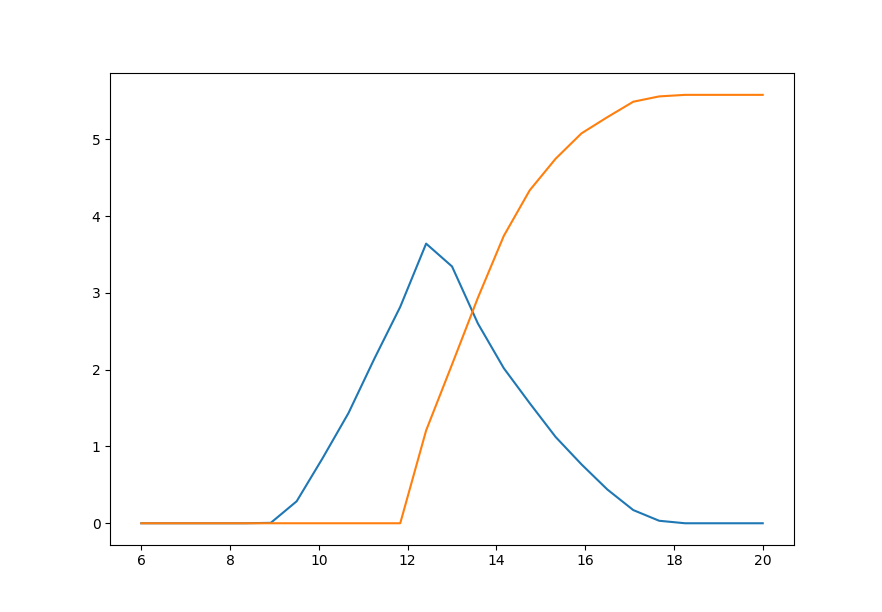

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.65272696511314177

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.20847381],
       [ 2.06714099],
       [ 2.93660829],
       [ 3.74179835],
       [ 4.33491674],
       [ 4.74599093],
       [ 5.07655846],
       [ 5.28773413],
       [ 5.48855284],
       [ 5.55777009],
       [ 5.57790414],
       [ 5.57790414],
       [ 5.57790414],
       [ 5.57790414]])